#The Economics of Happiness
## Abstract:
The World Happiness Report 2015-19 reveals a bright light in dark times. For example, the pandemic brought not only pain and suffering but also an increase in social support and benevolence. As we battle the ills of disease and war, it is essential to remember the universal desire for happiness and the capacity of individuals to rally to each other’s support in times of great need. This index is based on respondent ratings of their own lives, which the report also correlates with various (quality of) life factors. As of March 2022, Finland had been ranked the happiest country in the world five times in a row. Also, many African countries struggled with the happiness index.

The report is a publication of the Sustainable Development Solutions Network, a global initiative of the United Nations. The information primarily uses data from the Gallup World Poll. Each annual report is available to the public to download on the World Happiness Report website.

 

### Objectives:

* This study's goal is to determine which economic indicators contribute to the six life evaluation elements that the World Happiness Report rates countries on have no bearing on the overall score that is provided for each nation; instead, they are a mechanism for each government to explain the implications of the happiness score.

* This study will determine, clarify, and illustrate how well a country's political system and populace mesh to assess its level of happiness.

* This study also helps determine why African countries have struggled throughout these years and how some south Asian countries grew up the happiness index. We will also focus on countries with significant growth and loss on the happiness index.



# Installing Pycaret
PyCaret is an open-source, low-code machine learning library in Python that automates machine learning workflows.

In [1]:
#Installing Pycaret
# !pip install pycaret[full] --ignore-installed
!pip install pycaret
!pip install numpy==1.20

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Using cached numpy-1.19.5-cp38-cp38-manylinux2010_x86_64.whl (14.9 MB)
  Attempting uninstall: numpy
    Found existing installation: numpy 1.20.0
    Uninstalling numpy-1.20.0:
      Successfully uninstalled numpy-1.20.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
xarray 2022.12.0 requires numpy>=1.20, but you have numpy 1.19.5 which is incompatible.
xarray-einstats 0.4.0 requires numpy>=1.20, but you have numpy 1.19.5 which is incompatible.
xarray-einstats 0.4.0 requires scipy>=1.6, but you have scipy 1.5.4 which is incompatible.
tensorflow 2.9.2 requires numpy>=1.20, but you have numpy 1.19.5 which is incompatible.
jaxlib 0.3.25+cuda11.cudnn805 requires numpy>=1.20, but you have numpy 1.19.5 which is incompatible.
jax 0.3.25 requires numpy>=1.20, but you 

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Using cached numpy-1.20.0-cp38-cp38-manylinux2010_x86_64.whl (15.4 MB)
  Attempting uninstall: numpy
    Found existing installation: numpy 1.19.5
    Uninstalling numpy-1.19.5:
      Successfully uninstalled numpy-1.19.5
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
yellowbrick 1.3.post1 requires numpy<1.20,>=1.16.0, but you have numpy 1.20.0 which is incompatible.
xarray-einstats 0.4.0 requires scipy>=1.6, but you have scipy 1.5.4 which is incompatible.
en-core-web-sm 3.4.1 requires spacy<3.5.0,>=3.4.0, but you have spacy 2.3.9 which is incompatible.
cmdstanpy 1.0.8 requires numpy>=1.21, but you have numpy 1.20.0 which is incompatible.


#Importing Libraries
* NumPy is an open source project aiming to enable numerical computing with Python.
* Pandas is a fast, powerful, flexible and easy to use open source data analysis and manipulation tool, built on top of the Python programming language.
* Seaborn is a Python data visualization library based on matplotlib. It provides a high-level interface for drawing attractive and informative statistical graphics.
* Matplotlib is a comprehensive library for creating static, animated, and interactive visualizations in Python. Matplotlib makes easy things easy and hard things possible.
* SciPy is developed in the open on GitHub, through the consensus of the SciPy and wider scientific Python community. 


In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing

# Importing Packages
import seaborn as sns
import math 
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick # For specifying the axes tick format 
from scipy.stats import norm, skew #for some statistics
from scipy import stats
from sklearn.preprocessing import StandardScaler

# Importing Data Set
* Data Import lets you upload data from external sources.

In [3]:
from google.colab import files 
uploaded = files.upload()

Saving TEH_World_Happiness_2015_2019_Imputed.csv to TEH_World_Happiness_2015_2019_Imputed (3).csv


In [4]:
df=pd.read_csv("TEH_World_Happiness_2015_2019_Imputed.csv")

**Observation:** Imported TEH_World_Happiness_2015_2019_Imputed.csv data frame.

#Displaying Data Frame Head.
* The head() function is used to get the first n rows.

* This function returns the first n rows for the object based on position. It is useful for quickly testing if your object has the right type of data in it.

In [6]:
df.head()

,Country,Happiness rank,Happiness Score,GDP per capita,Social support,Healthy life,Freedom,Generosity,Corruption,Year
0,Switzerland,1,7.587,1.39651,1.34951,0.94143,0.66557,0.29678,0.41978,2015
1,Iceland,2,7.561,1.30232,1.40223,0.94784,0.62877,0.43630,0.14145,2015
2,Denmark,3,7.527,1.32548,1.36058,0.87464,0.64938,0.34139,0.48357,2015
3,Norway,4,7.522,1.45900,1.33095,0.88521,0.66973,0.34699,0.36503,2015
4,Canada,5,7.427,1.32629,1.32261,0.90563,0.63297,0.45811,0.32957,2015


**Observation:** We dispalyed above mentioned data heads.

# Data types, Missing Values, Uniques, Sample Values and Entropy of each Data Head and displaying total numbers of rows and column.
Displaying Data types, Missing Values, Uniques, Sample Values and Entropy of each Data Head and displaying total numbers of rows and column.

In [7]:
def resumetable(df):
    print(f"Dataset Shape: {df.shape}")
    summary = pd.DataFrame(df.dtypes,columns=['dtypes'])
    summary = summary.reset_index()
    summary['Name'] = summary['index']
    summary = summary[['Name','dtypes']]
    summary['Missing'] = df.isnull().sum().values    
    summary['Uniques'] = df.nunique().values
    summary['Sample Value'] = df.loc[0].values
    
    for name in summary['Name'].value_counts().index:
        summary.loc[summary['Name'] == name, 'Entropy'] = round(stats.entropy(df[name].value_counts(normalize=True), base=10),2)
    return summary
resumetable(df)

Dataset Shape: (782, 10)


,Name,dtypes,Missing,Uniques,Sample Value,Entropy
0,Country,object,0,170,Switzerland,2.22
1,Happiness rank,int64,0,158,1,2.20
2,Happiness Score,float64,0,716,7.587,2.84
3,GDP per capita,float64,5,741,1.39651,2.86
4,Social support,float64,5,731,1.34951,2.85
5,Healthy life,float64,5,704,0.94143,2.83
6,Freedom,float64,5,696,0.66557,2.82
7,Generosity,float64,5,663,0.29678,2.79
8,Corruption,float64,7,634,0.41978,2.75
9,Year,int64,0,5,2015,0.70


**Observation:** Country column is object type and there are none missing values in Country, Happiness Rank, Happiness Score and Year Column. There are five missing values in GDP per capitam Social Support, Healthly life, Freedom and Generosity. Also there is seven missing values in corruption. 

#Dropping Country Column:

In [8]:
df_=df.drop(columns='Country')

**Observation**: Country Column dropped because it is object data type.

# Simple Imputer
SimpleImputer is a scikit-learn class which is helpful in handling the missing data in the predictive model dataset. It replaces the NaN values with a specified placeholder. 


In [9]:
#import Simple Imputer
from sklearn.impute import SimpleImputer
Simple_imputer = SimpleImputer(missing_values=np.nan)

df_imputed=pd.DataFrame(Simple_imputer.fit_transform(df_))
df_imputed.columns=df_.columns
df_imputed.index=df_.index

In [10]:
df_imputed['Country']=df['Country']

In [11]:
df_imputed

,Happiness rank,Happiness Score,GDP per capita,Social support,Healthy life,Freedom,Generosity,Corruption,Year,Country
0,1.0,7.587,1.39651,1.349510,0.94143,0.665570,0.29678,0.41978,2015.0,Switzerland
1,2.0,7.561,1.30232,1.402230,0.94784,0.628770,0.43630,0.14145,2015.0,Iceland
2,3.0,7.527,1.32548,1.360580,0.87464,0.649380,0.34139,0.48357,2015.0,Denmark
3,4.0,7.522,1.45900,1.330950,0.88521,0.669730,0.34699,0.36503,2015.0,Norway
4,5.0,7.427,1.32629,1.322610,0.90563,0.632970,0.45811,0.32957,2015.0,Canada
...,...,...,...,...,...,...,...,...,...,...
777,152.0,3.334,0.35900,0.711000,0.61400,0.555000,0.21700,0.41100,2019.0,Rwanda
778,153.0,3.231,0.47600,0.885000,0.49900,0.417000,0.27600,0.14700,2019.0,Tanzania
779,154.0,3.203,0.35000,0.517000,0.36100,0.413736,0.15800,0.02500,2019.0,Afghanistan
780,155.0,3.083,0.02600,1.085332,0.10500,0.225000,0.23500,0.03500,2019.0,Central African Republic


**Observation:** We imputed the country column as it had object data type.

# Numerical Variables.
* A numeric variable (also called quantitative variable) is a quantifiable characteristic whose values are numbers (except numbers which are codes standing up for categories). Numeric variables may be either continuous or discrete.

* Checking the distribution of independent variables for our data frames.

<Figure size 576x360 with 0 Axes>

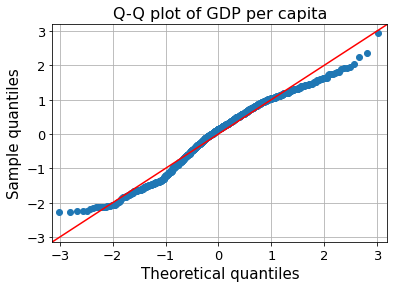

<Figure size 576x360 with 0 Axes>

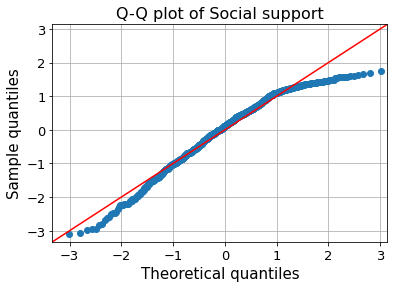

<Figure size 576x360 with 0 Axes>

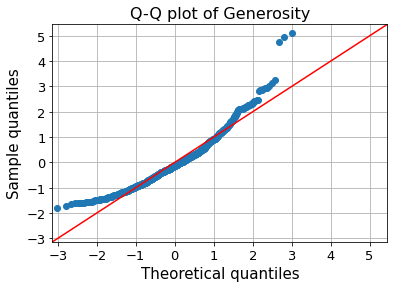

<Figure size 576x360 with 0 Axes>

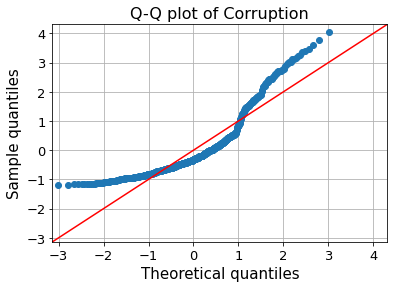

<Figure size 576x360 with 0 Axes>

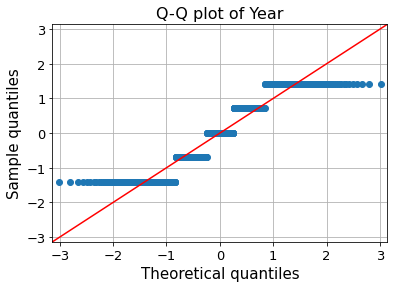

In [12]:
#checking the distribution of independent variables
from statsmodels.graphics.gofplots import qqplot
data_norm=df_imputed[['GDP per capita', 'Social support','Generosity','Corruption','Year']]
for c in data_norm.columns[:]:
  plt.figure(figsize=(8,5))
  fig=qqplot(data_norm[c],line='45',fit='True')
  plt.xticks(fontsize=13)
  plt.yticks(fontsize=13)
  plt.xlabel("Theoretical quantiles",fontsize=15)
  plt.ylabel("Sample quantiles",fontsize=15)
  plt.title("Q-Q plot of {}".format(c),fontsize=16)
  plt.grid(True)
  plt.show()

**Observation:**

# Checking the ranges of the predictor variables and dependent variable.


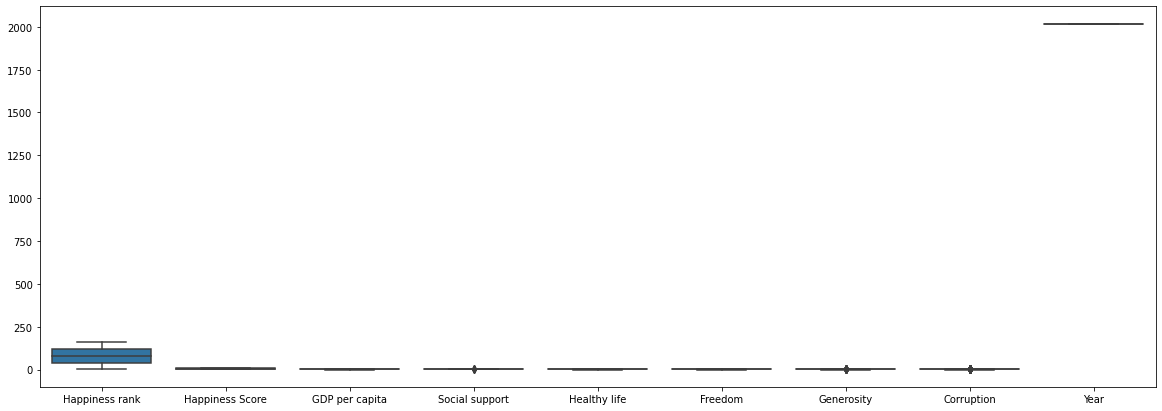

In [15]:
#Checking the Ranges of the predictor variables and dependent variable
plt.figure(figsize=(20,7))
sns.boxplot(data= df)


**Observation:**

In [16]:
scaler= StandardScaler()
X = scaler.fit_transform(df_)

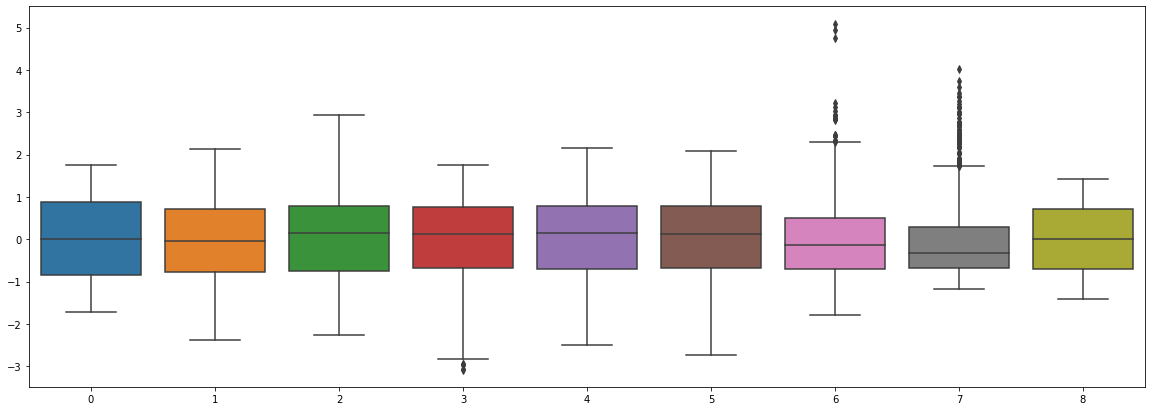

In [17]:
plt.figure(figsize=(20,7))
sns.boxplot(data=X)

# Checking the correlation between all the features in the data.
Correlation or dependence is any statistical relationship, whether causal or not, between two random variables or bivariate data. 

In [18]:
#checking the correlation between all the features in the data
df.corr()

,Happiness rank,Happiness Score,GDP per capita,Social support,Healthy life,Freedom,Generosity,Corruption,Year
Happiness rank,1.000000,-0.992066,-0.799415,-0.637763,-0.744931,-0.531287,-0.116123,-0.374581,-0.007768
Happiness Score,-0.992066,1.000000,0.793925,0.637676,0.744793,0.544895,0.136706,0.400351,0.007065
GDP per capita,-0.799415,0.793925,1.000000,0.566400,0.779604,0.352347,-0.002124,0.323365,0.020230
Social support,-0.637763,0.637676,0.566400,1.000000,0.561333,0.424474,-0.038168,0.119652,0.382121
Healthy life,-0.744931,0.744793,0.779604,0.561333,1.000000,0.330416,0.018854,0.255595,0.133432
Freedom,-0.531287,0.544895,0.352347,0.424474,0.330416,1.000000,0.268264,0.459008,0.010717
Generosity,-0.116123,0.136706,-0.002124,-0.038168,0.018854,0.268264,1.000000,0.321370,-0.195170
Corruption,-0.374581,0.400351,0.323365,0.119652,0.255595,0.459008,0.321370,1.000000,-0.122230
Year,-0.007768,0.007065,0.020230,0.382121,0.133432,0.010717,-0.195170,-0.122230,1.000000


**Observation:** we can observe the correlation between all the feauters among them and others. TO better understand the correlation, let us create heatmap using multicolinearity.

# Multicolinearity
Multicollinearity (also collinearity) is a phenomenon in which one predictor variable in a multiple regression model can be linearly predicted from the others with a substantial degree of accuracy.

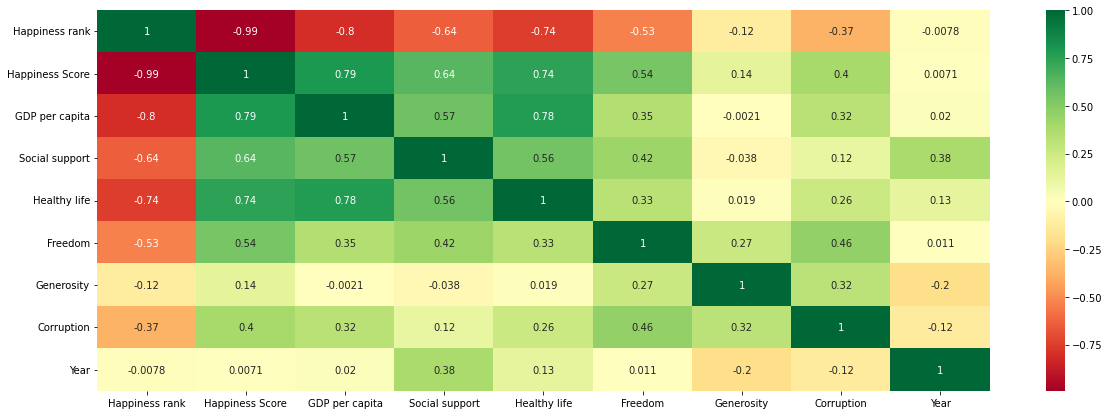

In [19]:
#the heat map of the correlation
plt.figure(figsize=(20,7))
sns.heatmap(df.corr(), annot=True, cmap='RdYlGn')

**Observation:** The observation in green is most correlated and the observation in red is least correlated. Here we can observe Happiness Rank is most correlated and Happiness Scorce is least correlated.

# Using Ordinary Least Squares (OLS) for finding the p value to check the significant features.
The ordinary least squares (OLS) method is a linear regression technique that is used to estimate the unknown parameters in a model. The method relies on minimizing the sum of squared residuals between the actual and predicted values. The OLS method can be used to find the best-fit line for data by minimizing the sum of squared errors or residuals between the actual and predicted values.

In [20]:
#Using OLS for finding the p value to check the significant features
import statsmodels.api as sm

model = sm.OLS(df_imputed['Happiness Score'], df_imputed[['Happiness rank', 'GDP per capita', 'Social support' ,'Healthy life' ,'Freedom','Generosity','Corruption','Year']]).fit()

# Print out the statistics
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:        Happiness Score   R-squared (uncentered):                   0.999
Model:                            OLS   Adj. R-squared (uncentered):              0.999
Method:                 Least Squares   F-statistic:                          1.598e+05
Date:                Sat, 17 Dec 2022   Prob (F-statistic):                        0.00
Time:                        22:21:07   Log-Likelihood:                          455.18
No. Observations:                 782   AIC:                                     -894.4
Df Residuals:                     774   BIC:                                     -857.1
Df Model:                           8                                                  
Covariance Type:            nonrobust                                                  
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Happiness rank    -0.0240      0.000   -109.490      0.000      -0.024      -0.024
GDP per capita    -0.0198      0.023     -0.869      0.385      -0.064       0.025
Social support     0.0209      0.021      0.994      0.321      -0.020       0.062
Healthy life       0.0885      0.033      2.652      0.008       0.023       0.154
Freedom            0.0800      0.043      1.867      0.062      -0.004       0.164
Generosity         0.1305      0.044      2.985      0.003       0.045       0.216
Corruption         0.2993      0.056      5.349      0.000       0.189       0.409
Year               0.0035   2.49e-05    141.684      0.000       0.003       0.004
==============================================================================
Omnibus:                      151.835   Durbin-Watson:                   0.426
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              435.271
Skew:                          -0.963   Prob(JB):                     3.04e-95
Kurtosis:                       6.107   Cond. No.                     2.50e+04
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[3] The condition number is large, 2.5e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

**Observation:** The p value of GDP per Capita and Social Support is 0.385 and 0.321 and the p values of Happiness rank, Heathly life, Freedom, Generosity, Corruption and Year is zero.

# Building the Model Train and Test split
The train-test split procedure is used to estimate the performance of machine learning algorithms when they are used to make predictions on data not used to train the model.

In [21]:
from sklearn.model_selection import  train_test_split

X = df[ ['Happiness rank','Happiness Score', 'GDP per capita', 'Social support' ,'Healthy life' ,'Freedom','Generosity','Corruption','Year']]

y = df['Country']


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=1)

**Observation:** We built X_train, X_test, y_train, y_test.

# Looking the data for test, training and validation set.
Looking the data for test, training and validation set andPlotting the data to see the histogram.

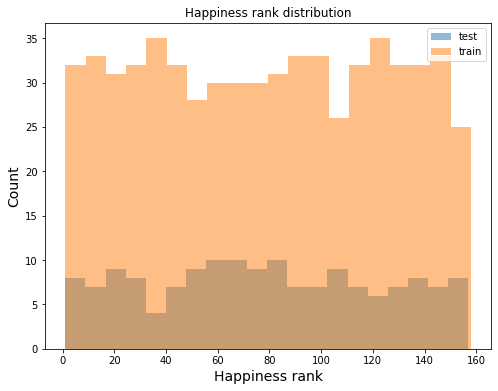

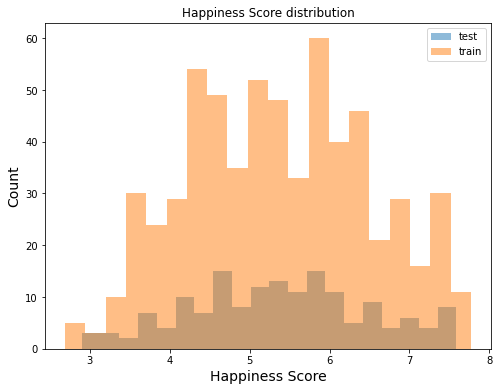

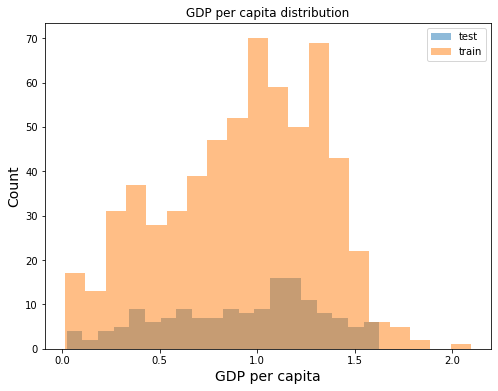

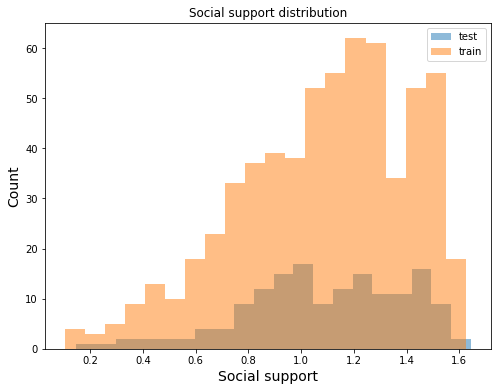

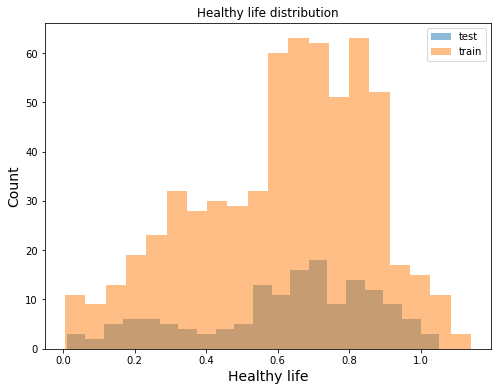

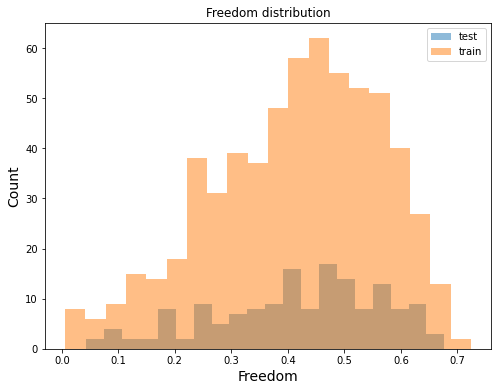

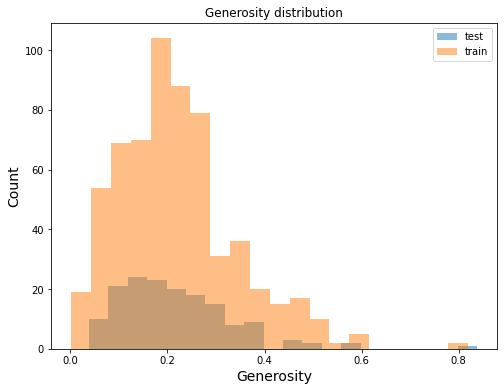

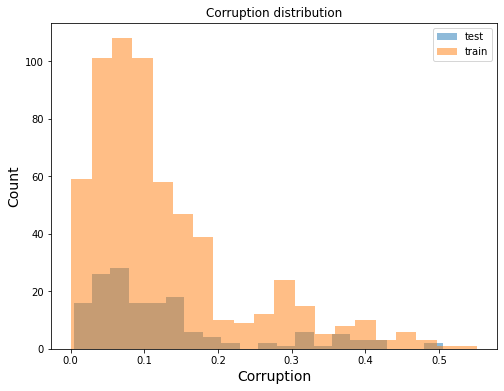

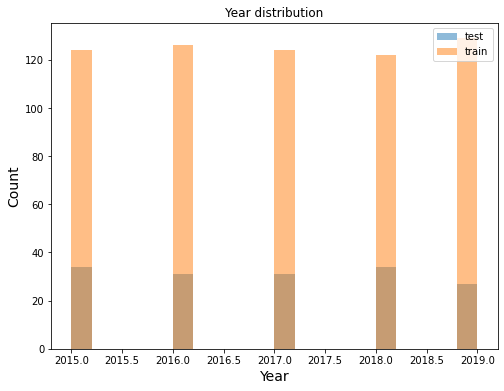

In [22]:
# Looking the data for test, training and validation set
X_test_plot = X_test[['Happiness rank','Happiness Score', 'GDP per capita', 'Social support' ,'Healthy life' ,'Freedom','Generosity','Corruption','Year']]


X_train_plot = X_train[['Happiness rank','Happiness Score', 'GDP per capita', 'Social support' ,'Healthy life' ,'Freedom','Generosity','Corruption','Year']]

# Plotting the data to see the histogram
for c in X_test_plot.columns[:]:
  plt.figure(figsize=(8,6))
  plt.hist(X_test_plot[c], bins=20, alpha=0.5, label="test")
  plt.hist(X_train_plot[c], bins=20, alpha=0.5, label="train")
  plt.xlabel(c, size=14)
  plt.ylabel("Count", size=14)
  plt.legend(loc='upper right')
  plt.title("{} distribution".format(c))
  plt.show()
 

**Observation:** We can observe the train and test of the data frames. The train is more observable than test.

#Regression
Machine learning regression models are mainly used in predictive analytics to forecast trends and predict outcomes. Regression models will be trained to understand the relationship between different independent variables and an outcome.

In [23]:
from pycaret.regression import *

In [24]:
df_new=df_imputed.drop(columns=['Country','Happiness rank'])

In [25]:
reg = setup(data = df_new, 
            target = 'Happiness Score',
            train_size=0.8,
            normalize=True,
            normalize_method='minmax',
            remove_multicollinearity=True,
            fold=5,
            transform_target=True,
            silent = True)

,Description,Value
0,session_id,8510
1,Target,Happiness Score
2,Original Data,"(782, 8)"
3,Missing Values,False
4,Numeric Features,7
5,Categorical Features,0
6,Ordinal Features,False
7,High Cardinality Features,False
8,High Cardinality Method,None
9,Transformed Train Set,"(625, 7)"


INFO:logs:create_model_container: 0
INFO:logs:master_model_container: 0
INFO:logs:display_container: 1
INFO:logs:Pipeline(memory=None,
         steps=[('dtypes',
                 DataTypes_Auto_infer(categorical_features=[],
                                      display_types=False, features_todrop=[],
                                      id_columns=[], ml_usecase='regression',
                                      numerical_features=[],
                                      target='Happiness Score',
                                      time_features=[])),
                ('imputer',
                 Simple_Imputer(categorical_strategy='not_available',
                                fill_value_categorical=None,
                                fill_value_numerical=None,
                                numeric_...
                ('dummy', Dummify(target='Happiness Score')),
                ('fix_perfect', Remove_100(target='Happiness Score')),
                ('clean_names', Clean_Co

**Observation:** We used regression model and now we will compare the best models.

# Comparing models:
Comparing models to find out the best model.

In [26]:
best_model=compare_models()

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
et,Extra Trees Regressor,0.3766,0.2355,0.4836,0.8219,0.0815,0.0761,0.188
rf,Random Forest Regressor,0.3932,0.2588,0.5075,0.8047,0.0845,0.0789,0.310
lightgbm,Light Gradient Boosting Machine,0.3965,0.2600,0.5090,0.8037,0.0852,0.0797,0.210
gbr,Gradient Boosting Regressor,0.4130,0.2838,0.5316,0.7859,0.0882,0.0821,0.126
br,Bayesian Ridge,0.4231,0.2917,0.5394,0.7796,0.0898,0.0844,0.022
lr,Linear Regression,0.4230,0.2919,0.5395,0.7795,0.0899,0.0844,0.712
ridge,Ridge Regression,0.4240,0.2918,0.5394,0.7795,0.0898,0.0845,0.020
lar,Least Angle Regression,0.4230,0.2919,0.5395,0.7795,0.0899,0.0844,0.022
huber,Huber Regressor,0.4209,0.2937,0.5412,0.7781,0.0902,0.0843,0.034
ada,AdaBoost Regressor,0.4617,0.3246,0.5690,0.7549,0.0932,0.0907,0.116


INFO:logs:create_model_container: 18
INFO:logs:master_model_container: 18
INFO:logs:display_container: 2
INFO:logs:PowerTransformedTargetRegressor(bootstrap=False, ccp_alpha=0.0, criterion='mse',
                                max_depth=None, max_features='auto',
                                max_leaf_nodes=None, max_samples=None,
                                min_impurity_decrease=0.0,
                                min_impurity_split=None, min_samples_leaf=1,
                                min_samples_split=2,
                                min_weight_fraction_leaf=0.0, n_estimators=100,
                                n_jobs=-1, oob_score=False,
                                power_transformer_method='box-cox',
                                powe...
                                regressor=ExtraTreesRegressor(bootstrap=False,
                                                              ccp_alpha=0.0,
                                                              criterion

**Observation:** We found out that Extra Trees Regressor is the best mdoel from above calculations.

# Creating Extra Trees Regressor Model:
We created extra tress regresor Model.

In [27]:
et = create_model('et')

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,0.4058,0.2695,0.5191,0.7919,0.0868,0.0820
1,0.4080,0.2916,0.5400,0.7789,0.0953,0.0854
2,0.3726,0.2237,0.4730,0.8273,0.0792,0.0758
3,0.3396,0.1868,0.4322,0.8670,0.0699,0.0653
4,0.3571,0.2060,0.4538,0.8446,0.0761,0.0722
Mean,0.3766,0.2355,0.4836,0.8219,0.0815,0.0761
Std,0.0268,0.0392,0.0402,0.0326,0.0088,0.0071


INFO:logs:create_model_container: 19
INFO:logs:master_model_container: 19
INFO:logs:display_container: 3
INFO:logs:PowerTransformedTargetRegressor(bootstrap=False, ccp_alpha=0.0, criterion='mse',
                                max_depth=None, max_features='auto',
                                max_leaf_nodes=None, max_samples=None,
                                min_impurity_decrease=0.0,
                                min_impurity_split=None, min_samples_leaf=1,
                                min_samples_split=2,
                                min_weight_fraction_leaf=0.0, n_estimators=100,
                                n_jobs=-1, oob_score=False,
                                power_transformer_method='box-cox',
                                powe...
                                regressor=ExtraTreesRegressor(bootstrap=False,
                                                              ccp_alpha=0.0,
                                                              criterion

# Tuning Extra Trees Regressor Model:
We have tunned Extra Trees Regressor model

In [28]:
tuned_model = tune_model(et)

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,0.4476,0.3151,0.5613,0.7566,0.0940,0.0912
1,0.4472,0.3367,0.5802,0.7447,0.1010,0.0932
2,0.4177,0.2851,0.5339,0.7799,0.0895,0.0858
3,0.3853,0.2479,0.4979,0.8235,0.0796,0.0737
4,0.3885,0.2500,0.5000,0.8114,0.0849,0.0792
Mean,0.4172,0.2869,0.5347,0.7832,0.0898,0.0846
Std,0.0271,0.0351,0.0327,0.0304,0.0074,0.0073


INFO:logs:create_model_container: 20
INFO:logs:master_model_container: 20
INFO:logs:display_container: 4
INFO:logs:PowerTransformedTargetRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mae',
                                max_depth=6, max_features=1.0,
                                max_leaf_nodes=None, max_samples=None,
                                min_impurity_decrease=0.0005,
                                min_impurity_split=None, min_samples_leaf=5,
                                min_samples_split=5,
                                min_weight_fraction_leaf=0.0, n_estimators=210,
                                n_jobs=-1, oob_score=False,
                                power_transformer_method='box-cox',
                                power_tr...
                                regressor=ExtraTreesRegressor(bootstrap=True,
                                                              ccp_alpha=0.0,
                                                              criterion=

# Plotting Residuals using tuned model:
We are plotting residuals using tuned model

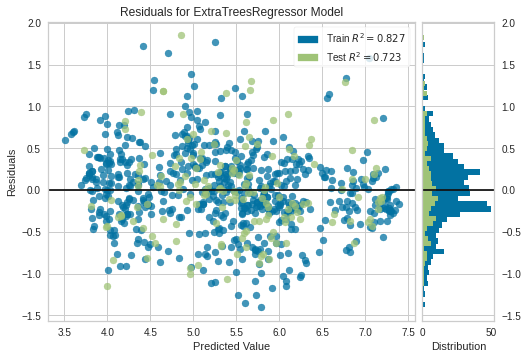

INFO:logs:Visual Rendered Successfully
INFO:logs:plot_model() succesfully completed......................................


In [29]:
plot_model(estimator = tuned_model, plot = 'residuals')

**Observation:** we have plot residuals model using tuned model. We can see the R square value of Train and Test which is 0.827 and 0.723.

#Ploting Feature Importance Plot:
We are plotting feature importance plot.

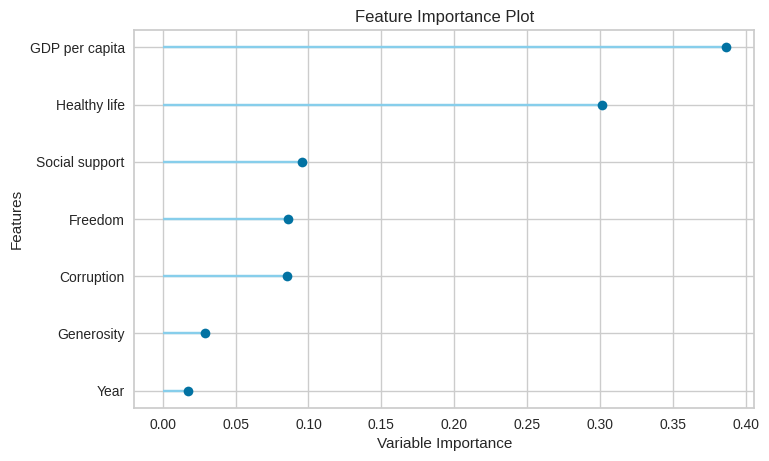

INFO:logs:Visual Rendered Successfully
INFO:logs:plot_model() succesfully completed......................................


In [30]:
plot_model(estimator = tuned_model, plot = 'feature')

**Observation:** We can observe GDP per capita and Healthly life has the most feature importance plot.

# Describing Data Frame again:

In [31]:
df.describe()


,Happiness rank,Happiness Score,GDP per capita,Social support,Healthy life,Freedom,Generosity,Corruption,Year
count,782.000000,782.000000,777.000000,777.000000,777.000000,777.000000,777.000000,775.000000,782.000000
mean,78.698210,5.379018,0.921942,1.085332,0.616356,0.413736,0.219982,0.126407,2016.993606
std,45.182384,1.127456,0.401937,0.318999,0.244177,0.149757,0.121445,0.105646,1.417364
min,1.000000,2.693000,0.015300,0.104190,0.005565,0.005890,0.001990,0.001000,2015.000000
25%,40.000000,4.509750,0.619000,0.871190,0.443000,0.312000,0.133520,0.055000,2016.000000
50%,79.000000,5.322000,0.985000,1.125000,0.649547,0.432453,0.202000,0.092000,2017.000000
75%,118.000000,6.189500,1.238000,1.330000,0.809158,0.531220,0.279920,0.156352,2018.000000
max,158.000000,7.769000,2.096000,1.644000,1.141000,0.724000,0.838075,0.551910,2019.000000


In [73]:
data=reg[21]

In [74]:
data

,GDP per capita,Social support,Healthy life,Freedom,Generosity,Corruption,Year
0,0.663820,0.808749,0.838262,0.918634,0.346191,0.760160,0.0
1,0.618551,0.842987,0.844004,0.867388,0.514712,0.254942,0.0
2,0.629682,0.815938,0.778438,0.896088,0.400074,0.875951,0.0
3,0.693853,0.796696,0.787905,0.924427,0.406838,0.660779,0.0
4,0.630072,0.791279,0.806196,0.873237,0.541055,0.596413,0.0
...,...,...,...,...,...,...,...
777,0.165185,0.394081,0.544980,0.764660,0.249828,0.744223,1.0
778,0.221416,0.507082,0.441974,0.572489,0.321092,0.265016,1.0
779,0.160859,0.268091,0.318366,0.567944,0.178564,0.043564,1.0
780,0.005143,0.637184,0.089065,0.305120,0.271570,0.061716,1.0


#Imorpting SHAP
SHAP (SHapley Additive exPlanations) is a game theoretic approach to explain the output of any machine learning model. It connects optimal credit allocation with local explanations using the classic Shapley values from game theory and their related extensions. 

In [75]:
import shap

In [76]:
X100 = shap.utils.sample(data, 100) # 100 instances for use as the background distribution

In [77]:
explainer = shap.Explainer(tuned_model.predict, X100)
shap_values = explainer(data)

Exact explainer: 783it [02:24,  5.16it/s]


# Plotting Beeswarm plot using SHAP

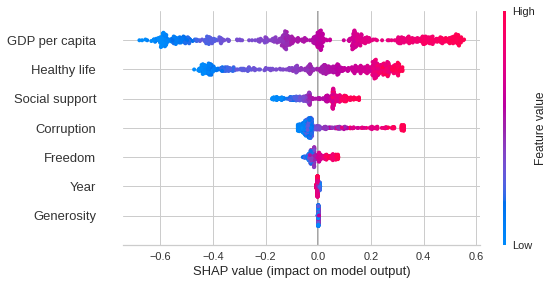

In [ ]:
shap.plots.beeswarm(shap_values)

**Observation:** GDP per capita is High when SHAP value is heavy postively and GDP per capita is low when SHAP value is negatively. Healthly life and Social support has increased moderately as SHAP value increases.

# Plotting Waterfall plot using SHAP

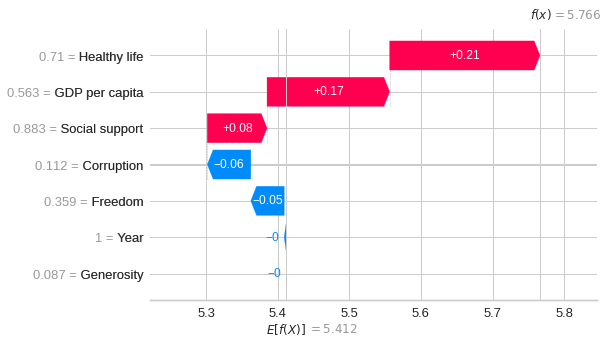

In [ ]:
shap.plots.waterfall(shap_values[20], max_display=10)

**Observation:** Healthy life and GDP per capita has positively effect on outcomes. Corruption and Freedom has negatively outcomes.

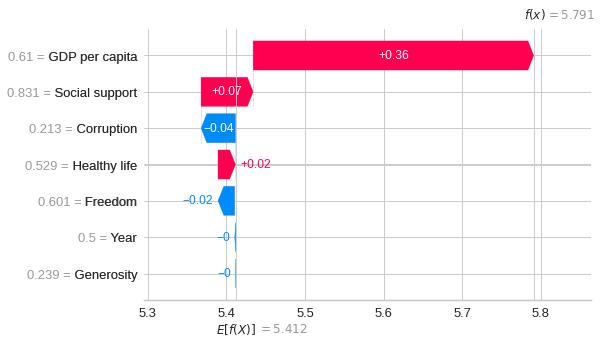

In [ ]:
shap.plots.waterfall(shap_values[50], max_display=10)

**Observation:** GDP per capita has more effects on the economics on happiness and Freedom has less effect on the same.

# Conclusion
We have used Regression and SHAP for analysis of economics of happiness dataframses. On the one hand, GDP per Capita contributed the most for the Happinesss of a Country. On The other, Generosity and Year contributed the least for the Happniness of a Country. We can also see the economics of happiness depends on GDP per capita. 



#License

Copyright (c) 2022 Rahul-Kodate

Permission is hereby granted, free of charge, to any person obtaining a copy of this software and associated documentation files (the "Software"), to deal in the Software without restriction, including without limitation the rights to use, copy, modify, merge, publish, distribute, sublicense, and/or sell copies of the Software, and to permit persons to whom the Software is furnished to do so, subject to the following conditions:

The above copyright notice and this permission notice shall be included in all copies or substantial portions of the Software.

THE SOFTWARE IS PROVIDED "AS IS", WITHOUT WARRANTY OF ANY KIND, EXPRESS OR IMPLIED, INCLUDING BUT NOT LIMITED TO THE WARRANTIES OF MERCHANTABILITY, FITNESS FOR A PARTICULAR PURPOSE AND NONINFRINGEMENT. IN NO EVENT SHALL THE AUTHORS OR COPYRIGHT HOLDERS BE LIABLE FOR ANY CLAIM, DAMAGES OR OTHER LIABILITY, WHETHER IN AN ACTION OF CONTRACT, TORT OR OTHERWISE, ARISING FROM, OUT OF OR IN CONNECTION WITH THE SOFTWARE OR THE USE OR OTHER DEALINGS IN THE SOFTWARE.